In [13]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [14]:
data = pd.read_csv('JohnsonJohnson.csv')
data.head()

,index,value
0,1960 Q1,0.71
1,1960 Q2,0.63
2,1960 Q3,0.85
3,1960 Q4,0.44
4,1961 Q1,0.61


In [15]:
Q1 = data[data['index'].str.contains('Q1')]
Q1 = Q1.drop('index', axis=1)
Q1['years'] = range(1960, 1981)

Q2 = data[data['index'].str.contains('Q2')]
Q2 = Q2.drop('index', axis=1)
Q2['years'] = range(1960, 1981)

Q3 = data[data['index'].str.contains('Q3')]
Q3 = Q3.drop('index', axis=1)
Q3['years'] = range(1960, 1981)

Q4 = data[data['index'].str.contains('Q4')]
Q4 = Q4.drop('index', axis=1)
Q4['years'] = range(1960, 1981)

avg_data = pd.DataFrame({'value': np.mean([Q1.value, Q2.value, Q3.value, Q4.value], axis=0), 'years': range(1960, 1981)})

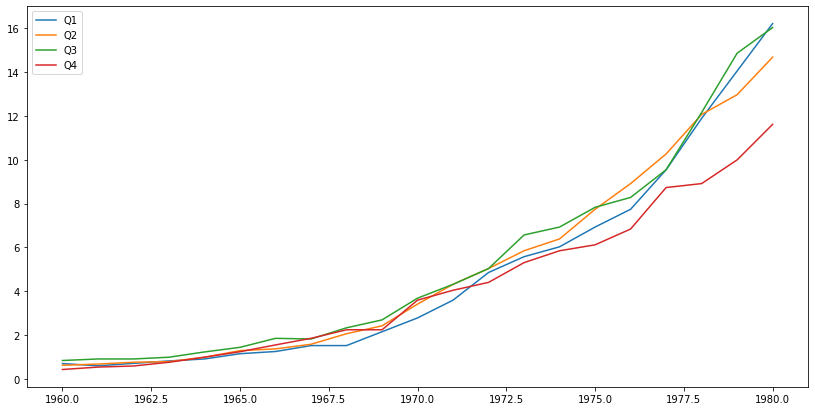

In [16]:
plt.figure(figsize=(14, 7))
plt.plot(Q1.years, Q1.value, label='Q1')
plt.plot(Q2.years, Q2.value, label='Q2')
plt.plot(Q3.years, Q3.value, label='Q3')
plt.plot(Q4.years, Q4.value, label='Q4')
#plt.plot(avg_data.years, avg_data.value, label='Среднее по кварталам')
plt.legend()

In [17]:
linear_1 = LinearRegression()
linear_1.fit(Q1.years.values.reshape(-1, 1), Q1.value)
linear_2 = LinearRegression()
linear_2.fit(Q2.years.values.reshape(-1, 1), Q2.value)
linear_3 = LinearRegression()
linear_3.fit(Q3.years.values.reshape(-1, 1), Q3.value)
linear_4 = LinearRegression()
linear_4.fit(Q4.years.values.reshape(-1, 1), Q4.value)
linear_avg = LinearRegression()
linear_avg.fit(avg_data.years.values.reshape(-1, 1), avg_data.value)

LinearRegression()

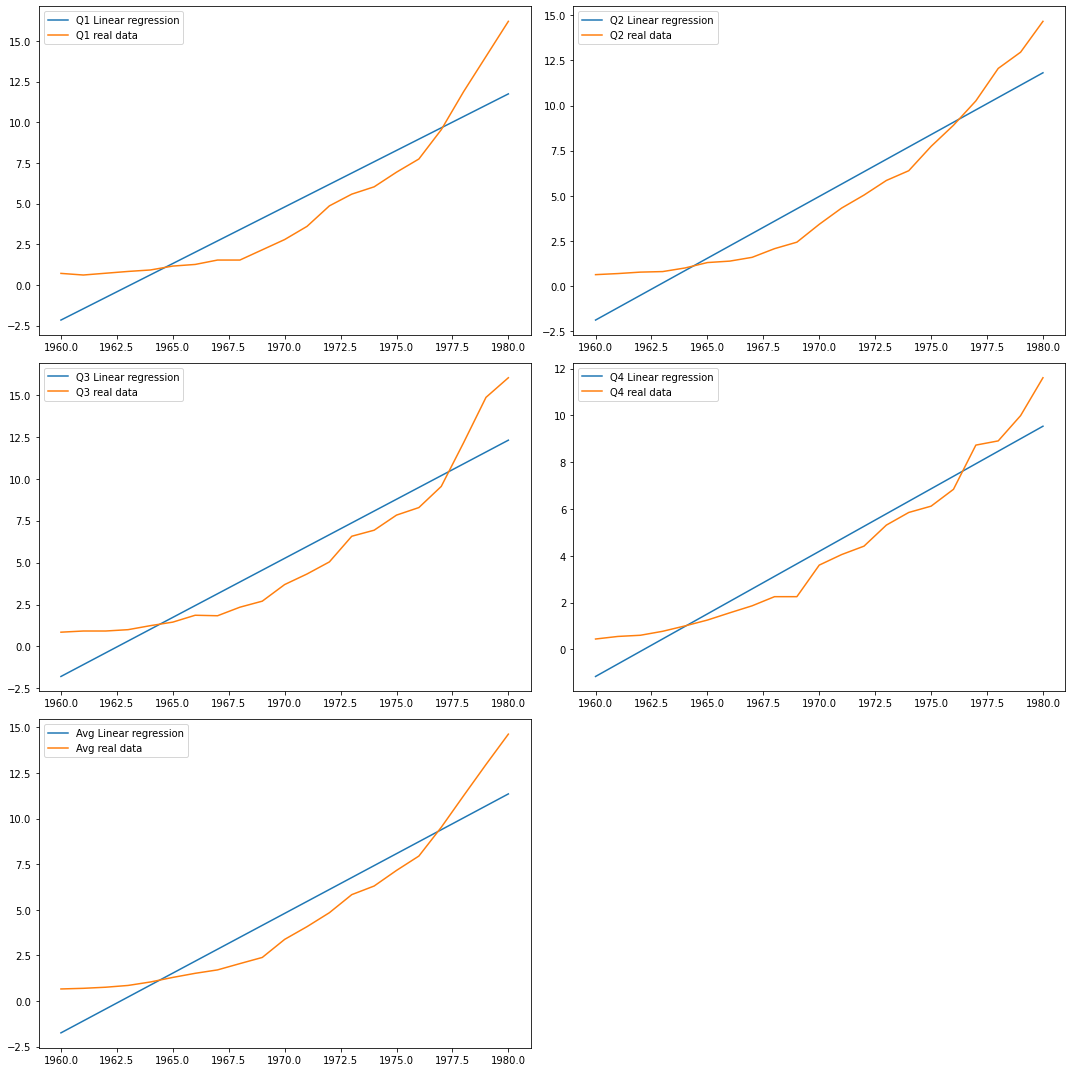

In [18]:
plt.figure(figsize=(15,15))
plt.subplot(3, 2, 1)
plt.plot(Q1.years, linear_1.predict(Q1.years.values.reshape(-1, 1)), label='Q1 Linear regression')
plt.plot(Q1.years, Q1.value, label='Q1 real data')
plt.legend()
plt.subplot(3, 2, 2)
plt.plot(Q1.years, linear_2.predict(Q1.years.values.reshape(-1, 1)), label='Q2 Linear regression')
plt.plot(Q2.years, Q2.value, label='Q2 real data')
plt.legend()
plt.subplot(3, 2, 3)
plt.plot(Q1.years, linear_3.predict(Q1.years.values.reshape(-1, 1)), label='Q3 Linear regression')
plt.plot(Q3.years, Q3.value, label='Q3 real data')
plt.legend()
plt.subplot(3, 2, 4)
plt.plot(Q1.years, linear_4.predict(Q1.years.values.reshape(-1, 1)), label='Q4 Linear regression')
plt.plot(Q4.years, Q4.value, label='Q4 real data')
plt.legend()
plt.subplot(3, 2, 5)
plt.plot(Q1.years, linear_avg.predict(Q1.years.values.reshape(-1, 1)), label='Avg Linear regression')
plt.plot(avg_data.years, avg_data.value, label='Avg real data')
plt.legend()
plt.tight_layout()

In [19]:
print('Q1 coef:', linear_1.coef_[0])
print('Q2 coef:', linear_2.coef_[0])
print('Q3 coef:', linear_3.coef_[0])
print('Q4 coef:', linear_4.coef_[0])

Q1 coef: 0.6949610389610388
Q2 coef: 0.6852987012987012
Q3 coef: 0.7043506493506491
Q4 coef: 0.5349090909090908


In [20]:
print('Прогноз прибыли в 2016 году, Q1:', linear_1.predict(np.array(2016).reshape(1, -1))[0])
print('Прогноз прибыли в 2016 году, Q2:', linear_2.predict(np.array(2016).reshape(1, -1))[0])
print('Прогноз прибыли в 2016 году, Q3:', linear_3.predict(np.array(2016).reshape(1, -1))[0])
print('Прогноз прибыли в 2016 году, Q4:', linear_4.predict(np.array(2016).reshape(1, -1))[0])
print('Прогноз прибыли в 2016 году, avg:', linear_avg.predict(np.array(2016).reshape(1, -1))[0])

Прогноз прибыли в 2016 году, Q1: 36.75963636363622
Прогноз прибыли в 2016 году, Q2: 36.48945454545469
Прогноз прибыли в 2016 году, Q3: 37.653939393939254
Прогноз прибыли в 2016 году, Q4: 28.79391341991345
Прогноз прибыли в 2016 году, avg: 34.924235930735904
